In [1]:
import numpy as np
import matplotlib.pyplot as plt
import inspect

In [2]:
import importlib
import sys
sys.path.append('../')
from Utils.perturbationsnew import RBPIndividual, RBPIndividualNew1, RBPIndividualNew2, zeroPerturb, noisePerturb, blurPerturb
from Utils.models import *
from Utils.data import perturb, generateSynthetic, generateSyntheticPerturbReal,ReadTS

print(sys.path)


['/Users/gali/anaconda3/envs/LIMEtf/lib/python310.zip', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10/lib-dynload', '', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10/site-packages', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10/site-packages/setuptools/_vendor', '../', '../']


## Test important content removal (accuracy decrease)

### Load synthetic dataset and train CNN model 

In [3]:
x_train, y_train,x_test_original, y_test_original = ReadTS('CricketX')
y_train = y_train - 1
y_test_original = y_test_original - 1
print(x_train.shape)
print(y_train)

(390, 300, 1)
[11.  8. 11.  8.  8.  0.  4. 11.  5.  0.  9.  9.  0.  3. 10.  4.  6.  8.
  6.  1.  5.  0.  4.  2.  8.  3.  6.  2.  5.  8. 11.  7. 11.  5.  1.  2.
  4.  3.  7.  5. 11.  7.  0.  0.  2. 10.  6. 11.  7.  6.  0.  5.  8.  9.
 10. 10.  6.  5.  5.  5.  9.  3.  1.  4. 10.  9.  1.  6.  7.  4. 10.  3.
  4.  1.  2.  5.  5.  2.  7. 10. 11.  9.  7.  9.  0. 10.  3.  8.  5.  6.
  6. 11.  3.  5.  6. 10.  9.  9.  6.  0.  8.  6.  2.  4. 11.  3.  0.  1.
  8.  0. 11. 10.  4.  0. 10.  2. 10.  8. 10.  0. 11.  4.  3. 11.  6.  9.
  7.  3.  5.  0.  8.  0. 10.  4.  1.  1.  8.  1. 10. 10.  9.  2.  8.  5.
  3.  9.  3.  5.  8.  8.  1.  2. 11.  0.  0.  9.  2. 10.  0.  4.  4. 10.
  1.  2.  6.  3.  3.  1.  5.  7. 11. 10.  0.  7.  7.  2. 11. 11.  1.  5.
  6.  0.  3.  6.  4.  7.  5.  3.  3.  2.  6.  1.  3.  0.  9.  6. 10.  7.
  3.  7.  5.  3.  6. 11.  4.  4. 10.  0.  4.  2.  0.  4.  7.  0.  9.  1.
  2.  7.  4.  0.  6.  3. 11.  1.  7. 10.  5.  1.  3.  3.  7.  3.  2.  3.
  5. 10.  2.  1. 10. 11.  2.  5.  1. 

In [4]:
model = make_CNN_model(x_train.shape[1:],num_classes = 12)
trained_model, history = train_CNN_model(model, x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


2024-11-13 21:08:28.654220: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 1s 38ms/step - loss: 2.4038 - sparse_categorical_accuracy: 0.1186 - val_loss: 2.4773 - val_sparse_categorical_accuracy: 0.1026
Epoch 2/100
10/10 [==============================] - 0s 19ms/step - loss: 2.2378 - sparse_categorical_accuracy: 0.2244 - val_loss: 2.4684 - val_sparse_categorical_accuracy: 0.1026
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 2.1614 - sparse_categorical_accuracy: 0.3365 - val_loss: 2.4608 - val_sparse_categorical_accuracy: 0.0769
Epoch 4/100
10/10 [==============================] - 0s 18ms/step - loss: 2.1037 - sparse_categorical_accuracy: 0.4006 - val_loss: 2.4577 - val_sparse_categorical_accuracy: 0.1410
Epoch 5/100
10/10 [==============================] - 0s 17ms/step - loss: 2.0561 - sparse_categorical_accuracy: 0.4006 - val_loss: 2.4587 - val_sparse_categorical_accuracy: 0.2051
Epoch 6/100
10/10 [==============================] - 0s 14ms/step - loss: 2.0084 - sparse_categorical_accuracy: 

In [5]:
test_loss, test_acc = trained_model.evaluate(x_test_original, y_test_original)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

13/13 [==============================] - 0s 5ms/step - loss: 1.2430 - sparse_categorical_accuracy: 0.5615
Test accuracy 0.5615384578704834
Test loss 1.2429851293563843


### Create perturbed test sets and calculate decrease in accuracy

In [6]:
print(y_test_original.shape)

(390,)


In [7]:
print(inspect.getsource(perturb))
print(inspect.signature(perturb))

def perturb(perturbation_strategy, ts, index0, index1, global_ts = []):
    if perturbation_strategy == 'RBP':
        return RBPIndividual(ts, index0, index1)
    if perturbation_strategy == 'zero':
        return zeroPerturb(ts, index0, index1)
    if perturbation_strategy == 'noise':
        return noisePerturb(ts, index0, index1)
    if perturbation_strategy == 'blur':
        return blurPerturb(ts, index0, index1)
    if perturbation_strategy == 'RBP1':
        return RBPIndividualNew1(global_ts, ts, index0, index1)    
    if perturbation_strategy == 'RBP2':
        return RBPIndividualNew2(global_ts, ts, index0, index1)    

(perturbation_strategy, ts, index0, index1, global_ts=[])


In [46]:
predictions_original = model.predict(x_test_original)
perturb_test_set = x_test_original.copy()
perturb_test_set = perturb_test_set.reshape(x_test_original.shape[0:2])

x_test_rbp = np.asarray([perturb('RBP',x,200,300) for x in perturb_test_set])
x_test_rbp = np.expand_dims(x_test_rbp, axis=-1)
predictions_rbp = model.predict(x_test_rbp)

x_test_new1 = np.asarray([perturb('RBP1',x,200,300, global_ts = perturb_test_set) for x in perturb_test_set])
x_test_new1 = np.expand_dims(x_test_new1, axis=-1)
predictions_new1 = model.predict(x_test_new1)

#x_test_new2 = np.asarray([perturb('RBP2',x,400,500, global_ts = perturb_test_set) for x in perturb_test_set])
#x_test_new2 = np.expand_dims(x_test_new2, axis=-1)
#predictions_new2 = model.predict(x_test_new2)

x_test_zero = np.asarray([perturb('zero',x,200,300) for x in perturb_test_set])
x_test_zero = np.expand_dims(x_test_zero, axis=-1)
predictions_zero = model.predict(x_test_zero)

x_test_noise = np.asarray([perturb('noise',x,200,300) for x in perturb_test_set])
x_test_noise = np.expand_dims(x_test_noise, axis=-1)
predictions_noise = model.predict(x_test_noise)

x_test_blur = np.asarray([perturb('blur',x,200,300) for x in perturb_test_set])
x_test_blur = np.expand_dims(x_test_blur, axis=-1)
predictions_blur = model.predict(x_test_blur)

13/13 [==============================] - 0s 3ms/step


In [51]:
def l2norm(perturb):
    # 计算两个数组之间的差
    difference = perturb - x_test_original
    
    # 计算差的平方
    squared_difference = np.square(difference)
    
    # 计算平方和，沿着特征维度（axis=1），因为每个时间序列样本是一行
    sum_of_squares = np.sum(squared_difference, axis=1)
    
    # 计算平方和的平方根，即l2范数
    l2_norms = np.sqrt(sum_of_squares)
    
    average_l2_norm = np.mean(l2_norms)
    
    # l2_norms现在是一个形状为(467,)的数组，其中每个元素代表
    # 对应时间序列样本之间的l2范数
    print(average_l2_norm)  # 输出: (467,)

l2norm(x_test_rbp)
l2norm(x_test_new1)
l2norm(x_test_zero)
l2norm(x_test_noise)
l2norm(x_test_blur)

4.706377790583573
6.123060780654926
6.123108872982574
20.269838439841497
0.5591433678978074


In [48]:
def accuracy(predictions, labels):
    hits = 0
    for i in range(0,len(predictions)):
        if predictions[i] == labels[i]:
            hits += 1
    return hits/len(predictions)

In [49]:
original_accuracy = accuracy(np.argmax(predictions_original,axis=1), y_test_original)
rbp_accuracy = accuracy(np.argmax(predictions_rbp,axis=1), y_test_original)
new1_accuracy = accuracy(np.argmax(predictions_new1,axis=1), y_test_original)
#new2_accuracy = accuracy(np.argmax(predictions_new2,axis=1), y_test_original)
zero_accuracy = accuracy(np.argmax(predictions_zero,axis=1), y_test_original)
noise_accuracy = accuracy(np.argmax(predictions_noise,axis=1), y_test_original)
blur_accuracy = accuracy(np.argmax(predictions_blur,axis=1), y_test_original)

In [50]:
print(" Original Accuracy: " + str(original_accuracy) + "\n"+
    " RBP Accuracy: " + str(rbp_accuracy) + "\n"+
    " RBP1 Accuracy: " + str(new1_accuracy) + "\n"+
    #" RBP2 Accuracy: " + str(new2_accuracy) + "\n"+
      
    " Zero Accuracy: " + str(zero_accuracy) + "\n"+
    " Noise Accuracy: " + str(noise_accuracy) + "\n"+
    " Blur Accuracy: " + str(blur_accuracy) + "\n")

 Original Accuracy: 219
 RBP Accuracy: 219
 RBP1 Accuracy: 221
 Zero Accuracy: 221
 Noise Accuracy: 31
 Blur Accuracy: 240



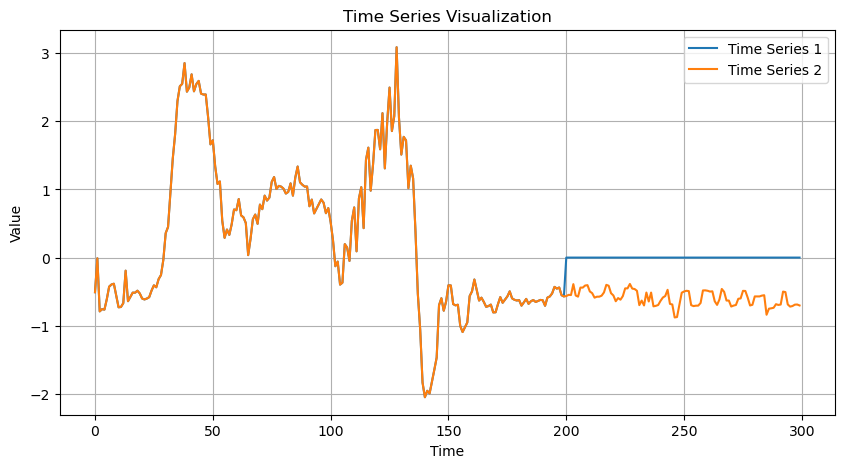

In [45]:
import numpy as np
import matplotlib.pyplot as plt

new1 = x_test_zero[2]
orig = x_test_original[2]

# 创建一个时间轴，对应于时间序列的索引
time_axis = np.arange(len(new1))

# 使用matplotlib绘制时间序列
plt.figure(figsize=(10, 5))  # 设置图形的大小
plt.plot(time_axis, new1, label='Time Series 1')  # 绘制第一个时间序列
plt.plot(time_axis, orig, label='Time Series 2')  # 绘制第二个时间序列

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Time Series Visualization')
plt.xlabel('Time')
plt.ylabel('Value')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()